# Fractal Walk --- PHY 261 --- Spring 2017

In this notebook I demonstrate a solution to the problem we discussed in class on Thursday. Also, this shows how to animate the grid.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
% matplotlib nbagg

ON = 255
OFF = 0

In [19]:
def randomWalk(particle):
    '''
    Randonly move a particle from its current position to one of its eight neighboring cells.
    '''
    x,y = particle
    rand = np.random.random()
    d = 1
    eighth = 0.125
    
    if (rand < eighth):
        x = x - d
        y = y + d
    elif (rand < 2*eighth):
        x = x - d
    elif (rand < 3*eighth):
        x = x - d
        y = y - d
    elif (rand < 4*eighth):
        y = y - d
    elif (rand < 5*eighth):
        x = x + d
        y = y - d
    elif (rand < 6*eighth):
        x = x + d
    elif (rand < 7*eighth):
        x = x + d
        y = y + d
    elif (rand < 1):
        y = y + d
        
    return (x,y)

<IPython.core.display.Javascript object>


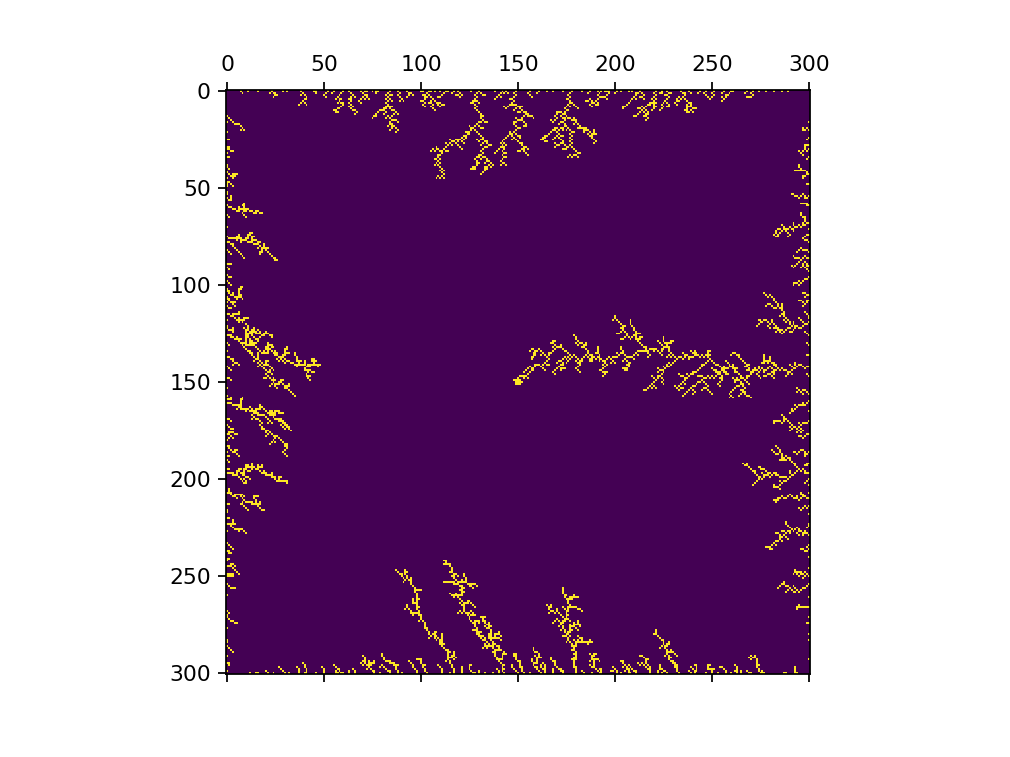

In [20]:
grid = np.zeros((301,301))
N = grid.shape[0]
grid[N//2,N//2] = ON
fig, ax = plt.subplots()
mat = ax.matshow(grid)
current_particle = (N//2,N//2)
    
def newAnimate(i):
    global grid
    global current_particle
    global N
    x,y = current_particle
    
    current_particle = randomWalk(current_particle)
    x_new,y_new = current_particle
    grid[x,y] = OFF
    grid[x_new,y_new] = ON
    
    if (x_new == 0 or y_new == 0 or x_new == N-1 or y_new == N-1 or 
        (grid[x_new-1,y_new-1] + grid[x_new,y_new-1] + 
         grid[x_new+1,y_new+1] +
         grid[x_new-1,y_new+1] + 
         grid[x_new,y_new+1] + 
         grid[x_new+1,y_new+1] +
         grid[x_new+1,y_new] +
         grid[x_new+1,y_new]) > 0):
            #
            current_particle = (N//2,N//2)
            grid[N//2,N//2] = ON        
        
    mat.set_data(grid)
    return [mat]

def fastAnimate(i):
    global grid
    global current_particle
    global N
    x,y = current_particle
    
    current_particle = randomWalk(current_particle)
    x_new,y_new = current_particle
    grid[x,y] = OFF
    grid[x_new,y_new] = ON
    
    while(not (x_new == 0 or y_new == 0 or x_new == N-1 or y_new == N-1 or 
        (grid[x_new-1,y_new-1] + grid[x_new,y_new-1] + 
         grid[x_new+1,y_new+1] +
         grid[x_new-1,y_new+1] + 
         grid[x_new,y_new+1] + 
         grid[x_new+1,y_new+1] +
         grid[x_new+1,y_new] +
         grid[x_new+1,y_new]) > 0)):
            #
        grid[x_new,y_new] = OFF
        current_particle = randomWalk(current_particle)
        x_new,y_new = current_particle
        grid[x_new,y_new] = ON
    
    current_particle = (N//2,N//2)
    grid[N//2,N//2] = ON
        
    mat.set_data(grid)
    return [mat]

# Create the animation object which will do our animaiton.
ani = animation.FuncAnimation(fig, fastAnimate, interval=1)
ani.save('f300.mp4', writer = F"ffmpeg", fps=30, extra_args=['-vcodec', 'libx264'])
# Display the animation
# plt.show()